# Week 3: LSTM model for Microsoft. Describing a forecasting model and confirming if last week's buy was good or not

I once again used yahoo finance as my financial data source and this week I researched into building a LSTM model to predict stock price for next day. Since I purchased Microsoft's stocks last week it would be good to see if my buy was worth it or not. 

I would be using numpy, matplotlib, pandas and tensorflow for building my model and analyzing the data.

The model is built such that all we have to do is change the company name and we would get the model for that company. 

LSTM: a time-series model known as Long Short-Term Memory. LSTM models are powerful, especially for retaining a long-term memory. Time-series forecasting models are the models that are capable to predict future values based on previously observed values. Time-series forecasting is widely used for non-stationary data. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
%matplotlib inline

We take two years as the time period and we load the data from yahoo finance.
MinMaxScalar scales all the data to be in the region of 0 and 1. This helps with normalization of data
We split the data into training set and test set

In [6]:
#Microsoft 
company = 'MSFT'
yahoo = 'yahoo'
startDate = dt.datetime(2019,11,20)
endDate = dt.datetime(2021,11,20)

data = web.DataReader(company, yahoo, startDate, endDate)

scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_days = 60

x_train = []
y_train = []

Here, we build the LSTM with 50 neurons and 3 hidden layers and the last one is the output layer.

Then we make predictions using the test set and we can use matplotlib to visualize the results. 

Epoch 1/25
14/14 [==============================] - 6s 89ms/step - loss: 0.0550
Epoch 2/25
14/14 [==============================] - 1s 90ms/step - loss: 0.0122
Epoch 3/25
14/14 [==============================] - 1s 92ms/step - loss: 0.0069
Epoch 4/25
14/14 [==============================] - 1s 91ms/step - loss: 0.0055
Epoch 5/25
14/14 [==============================] - 1s 90ms/step - loss: 0.0045
Epoch 6/25
14/14 [==============================] - 1s 89ms/step - loss: 0.0043
Epoch 7/25
14/14 [==============================] - 1s 88ms/step - loss: 0.0044
Epoch 8/25
14/14 [==============================] - 1s 89ms/step - loss: 0.0043
Epoch 9/25
14/14 [==============================] - 1s 90ms/step - loss: 0.0044
Epoch 10/25
14/14 [==============================] - 1s 89ms/step - loss: 0.0044
Epoch 11/25
14/14 [==============================] - 1s 91ms/step - loss: 0.0041
Epoch 12/25
14/14 [==============================] - 1s 89ms/step - loss: 0.0038
Epoch 13/25
14/14 [==================

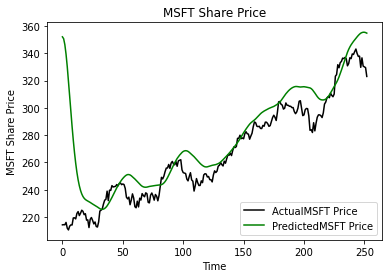

In [7]:
for x in range (prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days: x,0])
    y_train.append(scaled_data[x,0])
    
x_train,y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
          
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

          
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
          
model.add(Dense(units = 1))
          
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 25, batch_size = 32)

test_startDate = dt.datetime(2020,12,3)
test_endDate = dt.datetime(2021,12,3)

company = 'MSFT'
test_data = web.DataReader(company, yahoo, test_startDate, test_endDate)
          
actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'],test_data['Close']),axis = 0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

plt.plot(actual_prices, color = "black", label = f"Actual{company} Price")
plt.plot(predicted_prices, color = "green", label = f"Predicted{company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()


We can clearly see how the model closely follows the actual trend and can infact be used to roughly predict the stock price and can indicate if it was a good buy or not. 

## Week 4

This week, my aim was to see if I could purchase shares from the defense industry like:

- Northrop grumman
- BAE systems
-Honeywell
-Huntington industries
-Raytheon
-General Dynamics

All these companies have had a good past performance and I used the same LSTM model to predict if they would be a good buy. However, Investopedia wouldn't let me trade on Dec 10,2021 and therefore I couldn't buy them. By plugging into the same model, I concluded that out of all Raytheon would be a good buy for today as it had the highest difference in prediction (in positive direction). 